<a href="https://colab.research.google.com/github/AndreAmaral0802/real_state_funds_VS_SELIC/blob/main/Granger_M2_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression - M2 impact on USD rate**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv('drive/MyDrive/DX-Y.NYB_M2.csv')

In [ ]:
df.date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Close,M2
Date,,
01/01/1985,152.720001,2322.9
01/04/1985,149.699997,2370.6
01/07/1985,137.259995,2425.3
01/10/1985,129.389999,2460.8
01/01/1986,121.519997,2501.2


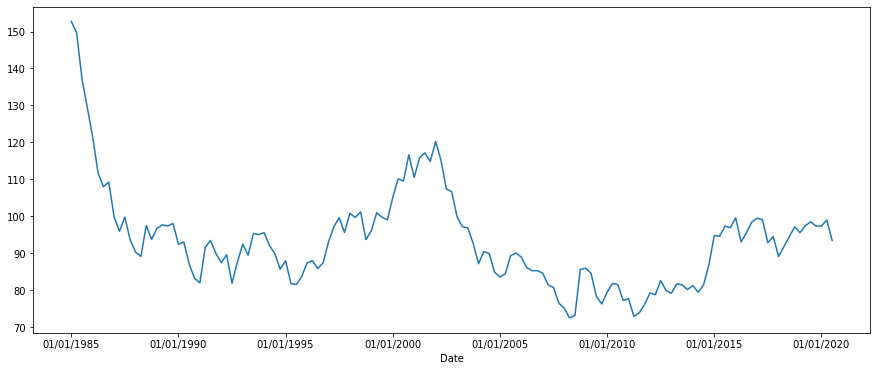

In [ ]:
df.Close.plot(figsize=(15, 6))


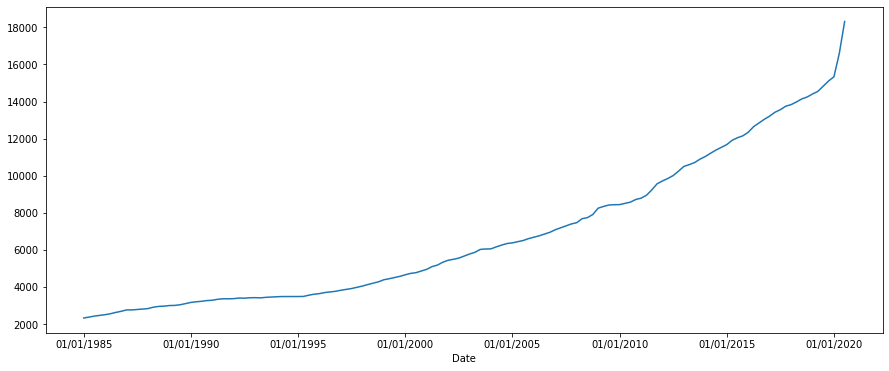

In [ ]:
df.M2.plot(figsize=(15, 6))

In [ ]:
df.dropna()

,Close,M2
Date,,
01/01/1985,152.720001,2322.9
01/04/1985,149.699997,2370.6
01/07/1985,137.259995,2425.3
01/10/1985,129.389999,2460.8
01/01/1986,121.519997,2501.2
...,...,...
01/07/2019,98.519997,14831.9
01/10/2019,97.349998,15110.5
01/01/2020,97.389999,15337.7


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
df = df[['Close', 'M2']].pct_change().dropna()

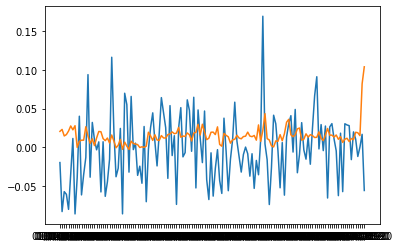

In [ ]:
plt.plot(df[['Close', 'M2']])

In [ ]:
grangercausalitytests(df, 4, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5312  , p=0.2180  , df_denom=138, df_num=1
ssr based chi2 test:   chi2=1.5645  , p=0.2110  , df=1
likelihood ratio test: chi2=1.5559  , p=0.2123  , df=1
parameter F test:         F=1.5312  , p=0.2180  , df_denom=138, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7830  , p=0.4591  , df_denom=135, df_num=2
ssr based chi2 test:   chi2=1.6241  , p=0.4440  , df=2
likelihood ratio test: chi2=1.6147  , p=0.4460  , df=2
parameter F test:         F=0.7830  , p=0.4591  , df_denom=135, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4305  , p=0.7315  , df_denom=132, df_num=3
ssr based chi2 test:   chi2=1.3600  , p=0.7149  , df=3
likelihood ratio test: chi2=1.3533  , p=0.7165  , df=3
parameter F test:         F=0.4305  , p=0.7315  , df_denom=132, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3068  , p=0.8730  

{1: ({'lrtest': (1.5558804175336718, 0.21226942723258074, 1),
   'params_ftest': (1.531209192227923, 0.2180324276814942, 138.0, 1.0),
   'ssr_chi2test': (1.5644963485806545, 0.21100808093135676, 1),
   'ssr_ftest': (1.5312091922278748, 0.21803242768150277, 138.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.614716782254959, 0.44603476073676473, 2),
   'params_ftest': (0.7830311021043084, 0.45908304338763384, 135.0, 2.0),
   'ssr_chi2test': (1.6240645080682299, 0.44395491964572587, 2),
   'ssr_ftest': (0.7830311021043251, 0.4590830433876233, 135.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.3533457625203482, 0.7165062352433461, 3),
   'params_ftest': (0.4304895066773809, 0.7314993939865568, 132.0, 3.0),
   'ssr_chi2test': (1.3599554870036221, 0.7149476366099097, 3),
   'ssr_ftest': (0.4304895066774056, 0.7314993939865356, 132.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [ ]:
# In this we accept the null hypothesis of no causality. 